In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image as img
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.utils import model_to_dot

import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [2]:
from google.colab import files

uploaded = files.upload()  # Opens a file upload dialog


Saving kaggle.json to kaggle.json


In [3]:
import os
import shutil

# Create .kaggle folder if not exists
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct directory
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set proper permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

In [4]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
seg_train = train_datagen.flow_from_directory('/content/seg_train/seg_train',
                                                 target_size = (256, 256),
                                              color_mode="rgb",
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
seg_test = test_datagen.flow_from_directory('/content/seg_test/seg_test',
                                            target_size = (256, 256),
                                            color_mode="rgb",
                                            batch_size = 32,
                                            class_mode = 'categorical')
IMAGE_SIZE = (256,256)

Found 3000 images belonging to 6 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,756,070 (60.10 MB)

 Trainable params: 15,756,070 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
trained= cnn.fit(x = seg_train, validation_data = seg_test, epochs = 15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 214s 468ms/step - accuracy: 0.5220 - loss: 1.8330 - val_accuracy: 0.6807 - val_loss: 0.8537
Epoch 2/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 203s 462ms/step - accuracy: 0.7335 - loss: 0.7419 - val_accuracy: 0.7520 - val_loss: 0.6962
Epoch 3/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 262s 462ms/step - accuracy: 0.7814 - loss: 0.6012 - val_accuracy: 0.7767 - val_loss: 0.6298
Epoch 4/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 201s 457ms/step - accuracy: 0.8127 - loss: 0.5350 - val_accuracy: 0.7897 - val_loss: 0.5921
Epoch 5/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 198s 451ms/step - accuracy: 0.8190 - loss: 0.4979 - val_accuracy: 0.8250 - val_loss: 0.5194
Epoch 6/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 196s 447ms/step - accuracy: 0.8418 - loss: 0.4436 - val_accuracy: 0.8333 - val_loss: 0.4848
Epoch 7/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 201s 457ms/step - accuracy: 0.8409 - loss: 0.4264 - val_accuracy: 0.8200 - val_loss: 0.5297
Epoch 8/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 199s 453ms/step - accuracy: 0.8630 -

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step


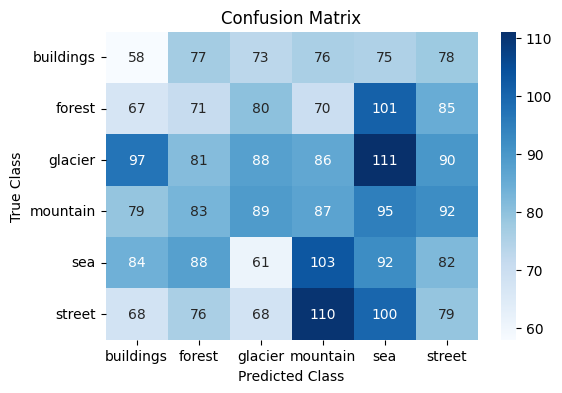

False Positive Rate (Type I Error): [0.87196468 0.85084034 0.80827887 0.83646617 0.83972125 0.84387352]
False Negative Rate (Type II Error): [0.86727689 0.85021097 0.84086799 0.83428571 0.81960784 0.84231537]
Z-Score: -0.817367123229796, P-Value: 0.20685932901982956
T-Statistic: -0.8920697242646082, P-Value: 0.37239134698351617
F-Statistic: 0.7957883929495482, P-Value: 0.37239134698341936


In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn.predict(seg_test, steps=len(seg_test))
y_pred_classes = np.argmax(y_pred, axis=1)  # Getting the predicted classes

# Ground truth labels
y_true = seg_test.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=seg_test.class_indices.keys(), yticklabels=seg_test.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
# Type I Error (False Positive):
# (Predicted positive, but actual negative)

false_positive = cm.sum(axis=0) - np.diagonal(cm)
false_positive_rate = false_positive / cm.sum(axis=0)
print(f"False Positive Rate (Type I Error): {false_positive_rate}")
# Type II Error (False Negative):
# (Predicted negative, but actual positive)

false_negative = cm.sum(axis=1) - np.diagonal(cm)
false_negative_rate = false_negative / cm.sum(axis=1)
print(f"False Negative Rate (Type II Error): {false_negative_rate}")
from scipy.stats import norm

# Example data: Sample mean for the two datasets
mean1 = np.mean(y_true)  # True classes
mean2 = np.mean(y_pred_classes)  # Predicted classes
std1 = np.std(y_true)
std2 = np.std(y_pred_classes)

# Sample size
n1 = len(y_true)
n2 = len(y_pred_classes)

# Z-test formula
z_score = (mean1 - mean2) / np.sqrt((std1*2 / n1) + (std2*2 / n2))

# p-value from the Z-score
p_value = norm.sf(abs(z_score))  # One-tailed test

print(f"Z-Score: {z_score}, P-Value: {p_value}")
from scipy.stats import ttest_ind

# Example data: Two sample groups (true classes vs predicted classes)
t_stat, p_value = ttest_ind(y_true, y_pred_classes)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
from scipy.stats import f_oneway

# Assume you have multiple sets of predictions, here for demonstration we use two sets
group1 = y_true  # True labels
group2 = y_pred_classes  # Predicted labels

# One-way ANOVA test
f_stat, p_val = f_oneway(group1, group2)

print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

In [18]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_probs = cnn.predict(seg_test)  # Assuming seg_test is a dataset
y_true = seg_test.labels  # Extracting true labels

# Convert probabilities to class labels (assuming multi-class)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = y_true  # Convert one-hot to labels


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step


In [19]:
print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.14      0.14      0.14       437
           1       0.14      0.14      0.14       474
           2       0.18      0.15      0.16       553
           3       0.18      0.18      0.18       525
           4       0.17      0.19      0.18       510
           5       0.17      0.17      0.17       501

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.16      0.16      3000



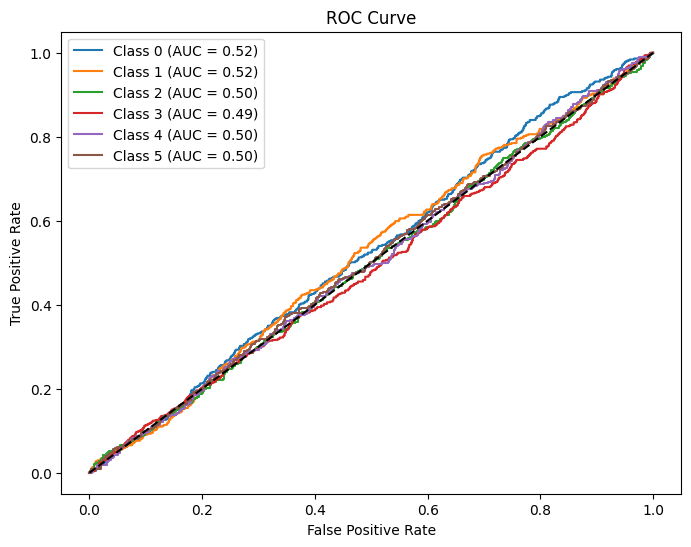

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the labels for multi-class ROC
y_true_bin = label_binarize(y_true_classes, classes=np.arange(len(seg_train.class_indices)))

plt.figure(figsize=(8, 6))
for i in range(y_true_bin.shape[1]):  # Loop over each class
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


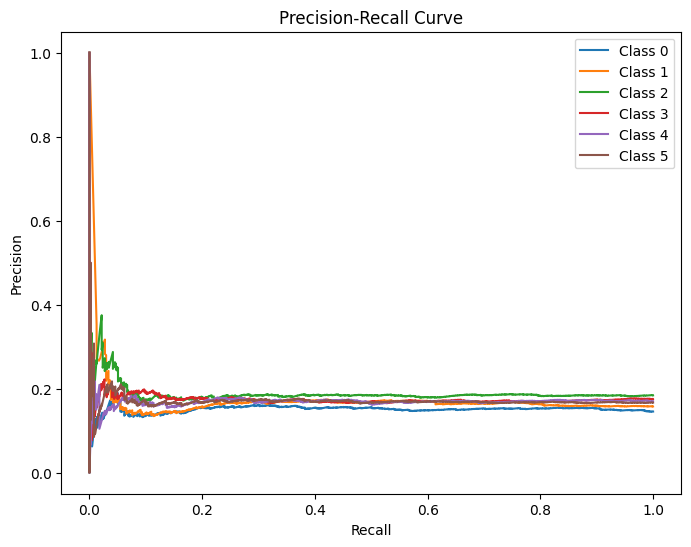

In [21]:
plt.figure(figsize=(8, 6))
for i in range(y_true_bin.shape[1]):  # Loop over each class
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


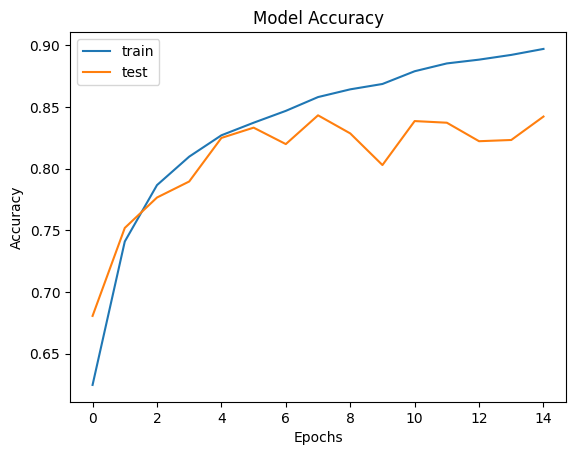

In [22]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [23]:
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('/content/seg_pred/seg_pred/5.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Building'
elif result[0][1] == 1:
  prediction = 'Forest'
elif result[0][2] == 1:
  prediction = 'Glacier'
elif result[0][3] == 1:
  prediction = 'Mountain'
elif result[0][4] == 1:
  prediction = 'Sea'
elif result[0][5] == 1:
  prediction = 'Street'
else:
    print("Error")
result
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
Building


Text(0.5, 1.0, 'Street Image')

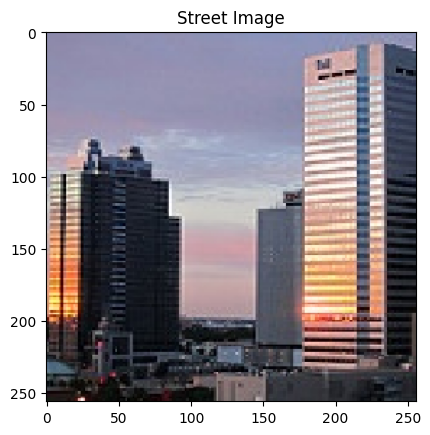

In [24]:
from IPython.display import display
from PIL import Image
display(plt.imshow(test_image1))
plt.title("Street Image")

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step


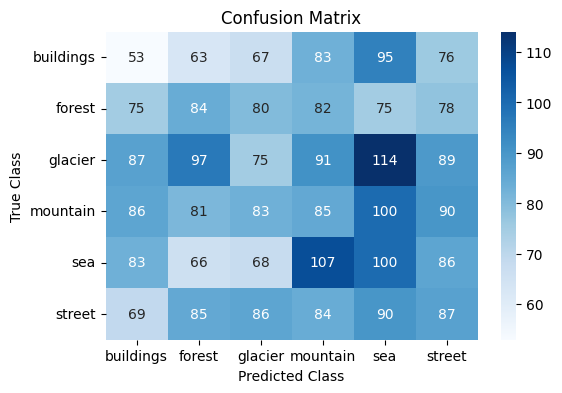

False Positive Rate (Type I Error): [0.88300221 0.82352941 0.83660131 0.84022556 0.82578397 0.82806324]
False Negative Rate (Type II Error): [0.87871854 0.82278481 0.86437613 0.83809524 0.80392157 0.82634731]
Z-Score: -0.817367123229796, P-Value: 0.20685932901982956
T-Statistic: -0.8920697242646082, P-Value: 0.37239134698351617
F-Statistic: 0.7957883929495482, P-Value: 0.37239134698341936


In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn.predict(seg_test, steps=len(seg_test))
y_pred_classes = np.argmax(y_pred, axis=1)  # Getting the predicted classes

# Ground truth labels
y_true = seg_test.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=seg_test.class_indices.keys(), yticklabels=seg_test.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
# Type I Error (False Positive):
# (Predicted positive, but actual negative)

false_positive = cm.sum(axis=0) - np.diagonal(cm)
false_positive_rate = false_positive / cm.sum(axis=0)
print(f"False Positive Rate (Type I Error): {false_positive_rate}")
# Type II Error (False Negative):
# (Predicted negative, but actual positive)

false_negative = cm.sum(axis=1) - np.diagonal(cm)
false_negative_rate = false_negative / cm.sum(axis=1)
print(f"False Negative Rate (Type II Error): {false_negative_rate}")
from scipy.stats import norm

# Example data: Sample mean for the two datasets
mean1 = np.mean(y_true)  # True classes
mean2 = np.mean(y_pred_classes)  # Predicted classes
std1 = np.std(y_true)
std2 = np.std(y_pred_classes)

# Sample size
n1 = len(y_true)
n2 = len(y_pred_classes)

# Z-test formula
z_score = (mean1 - mean2) / np.sqrt((std1*2 / n1) + (std2*2 / n2))

# p-value from the Z-score
p_value = norm.sf(abs(z_score))  # One-tailed test

print(f"Z-Score: {z_score}, P-Value: {p_value}")
from scipy.stats import ttest_ind

# Example data: Two sample groups (true classes vs predicted classes)
t_stat, p_value = ttest_ind(y_true, y_pred_classes)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
from scipy.stats import f_oneway

# Assume you have multiple sets of predictions, here for demonstration we use two sets
group1 = y_true  # True labels
group2 = y_pred_classes  # Predicted labels

# One-way ANOVA test
f_stat, p_val = f_oneway(group1, group2)

print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
seg_train = train_datagen.flow_from_directory('/content/seg_train/seg_train',
                                                 target_size = (200, 200),
                                              color_mode="grayscale",
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [27]:
test_datagen = ImageDataGenerator(rescale = 1./255)
seg_test = test_datagen.flow_from_directory('/content/seg_test/seg_test',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                             color_mode="grayscale",
                                            class_mode = 'categorical')
IMAGE_SIZE = (200,200)


Found 3000 images belonging to 6 classes.


In [28]:
cnn = tf.keras.models.Sequential()

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[200,200, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [32]:
cnn.add(tf.keras.layers.Flatten())

In [33]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [34]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [35]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 198, 198, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 97, 97, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       9,437,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,447,654 (36.04 MB)

 Trainable params: 9,447,654 (36.04 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
trained= cnn.fit(x = seg_train, validation_data = seg_test, epochs = 15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 63s 135ms/step - accuracy: 0.4309 - loss: 1.5863 - val_accuracy: 0.6293 - val_loss: 0.9904
Epoch 2/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 62s 142ms/step - accuracy: 0.6539 - loss: 0.9177 - val_accuracy: 0.6257 - val_loss: 1.0926
Epoch 3/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 56s 128ms/step - accuracy: 0.7077 - loss: 0.7658 - val_accuracy: 0.6437 - val_loss: 1.0051
Epoch 4/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 58s 132ms/step - accuracy: 0.7368 - loss: 0.7089 - val_accuracy: 0.7450 - val_loss: 0.6940
Epoch 5/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 57s 129ms/step - accuracy: 0.7574 - loss: 0.6406 - val_accuracy: 0.7367 - val_loss: 0.7507
Epoch 6/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.7771 - loss: 0.6011 - val_accuracy: 0.7763 - val_loss: 0.6231
Epoch 7/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.7975 - loss: 0.5479 - val_accuracy: 0.7730 - val_loss: 0.6531
Epoch 8/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 55s 124ms/step - accuracy: 0.8048 - loss: 0

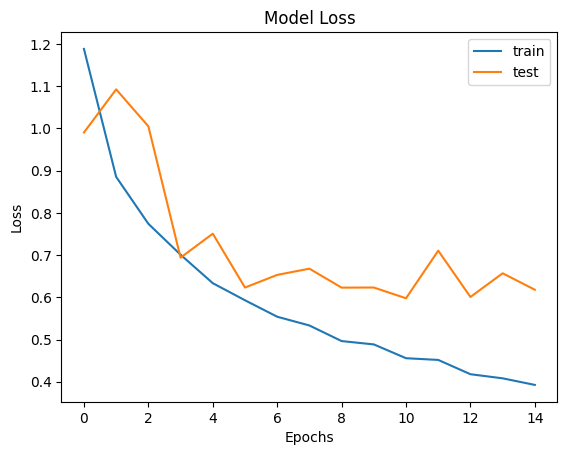

In [38]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

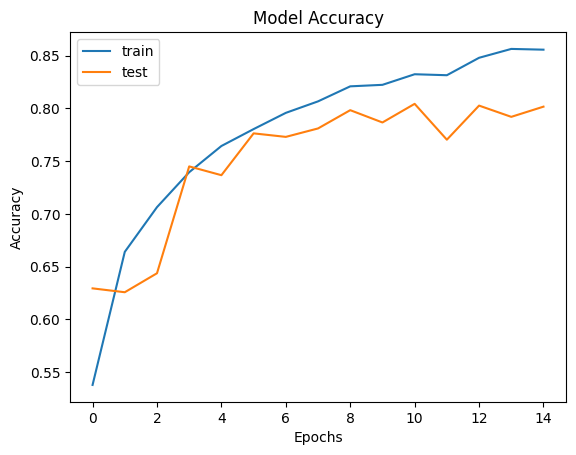

In [39]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [40]:
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('/content/seg_pred/seg_pred/5.jpg', target_size = (200, 200),color_mode="grayscale")
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Building'
elif result[0][1] == 1:
  prediction = 'Forest'
elif result[0][2] == 1:
  prediction = 'Glacier'
elif result[0][3] == 1:
  prediction = 'Mountain'
elif result[0][4] == 1:
  prediction = 'Sea'
elif result[0][5] == 1:
  prediction = 'Street'
else:
    print("Error")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


In [41]:
result

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
print(prediction)

Building


Text(0.5, 1.0, 'Street Image')

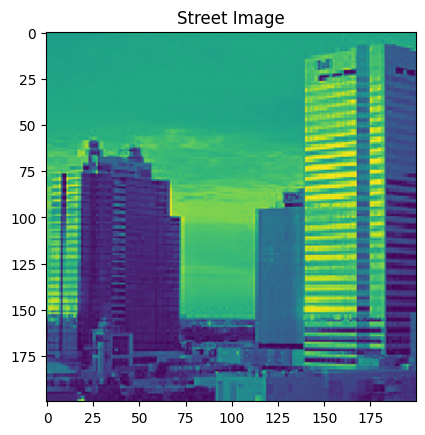

In [43]:
from IPython.display import display
from PIL import Image
display(plt.imshow(test_image1))
plt.title("Street Image")

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


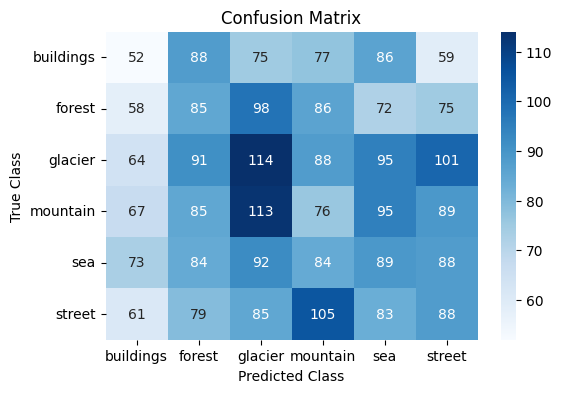

False Positive Rate (Type I Error): [0.86133333 0.83398438 0.80242634 0.85271318 0.82884615 0.824     ]
False Negative Rate (Type II Error): [0.88100686 0.82067511 0.79385172 0.8552381  0.8254902  0.8243513 ]
Z-Score: -0.6677072165630439, P-Value: 0.25216025128465647
T-Statistic: -0.7346146399134743, P-Value: 0.46260293768290095
F-Statistic: 0.5396586691752181, P-Value: 0.4626029376830346


In [44]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn.predict(seg_test, steps=len(seg_test))
y_pred_classes = np.argmax(y_pred, axis=1)  # Getting the predicted classes

# Ground truth labels
y_true = seg_test.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=seg_test.class_indices.keys(), yticklabels=seg_test.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
# Type I Error (False Positive):
# (Predicted positive, but actual negative)

false_positive = cm.sum(axis=0) - np.diagonal(cm)
false_positive_rate = false_positive / cm.sum(axis=0)
print(f"False Positive Rate (Type I Error): {false_positive_rate}")
# Type II Error (False Negative):
# (Predicted negative, but actual positive)

false_negative = cm.sum(axis=1) - np.diagonal(cm)
false_negative_rate = false_negative / cm.sum(axis=1)
print(f"False Negative Rate (Type II Error): {false_negative_rate}")
from scipy.stats import norm

# Example data: Sample mean for the two datasets
mean1 = np.mean(y_true)  # True classes
mean2 = np.mean(y_pred_classes)  # Predicted classes
std1 = np.std(y_true)
std2 = np.std(y_pred_classes)

# Sample size
n1 = len(y_true)
n2 = len(y_pred_classes)

# Z-test formula
z_score = (mean1 - mean2) / np.sqrt((std1*2 / n1) + (std2*2 / n2))

# p-value from the Z-score
p_value = norm.sf(abs(z_score))  # One-tailed test

print(f"Z-Score: {z_score}, P-Value: {p_value}")
from scipy.stats import ttest_ind

# Example data: Two sample groups (true classes vs predicted classes)
t_stat, p_value = ttest_ind(y_true, y_pred_classes)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
from scipy.stats import f_oneway

# Assume you have multiple sets of predictions, here for demonstration we use two sets
group1 = y_true  # True labels
group2 = y_pred_classes  # Predicted labels

# One-way ANOVA test
f_stat, p_val = f_oneway(group1, group2)

print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

In [50]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_probs = cnn.predict(seg_test)  # Assuming seg_test is a dataset
y_true = seg_test.labels  # Extracting true labels

# Convert probabilities to class labels (assuming multi-class)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = y_true  # Convert one-hot to labels


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step


In [51]:
print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.15      0.13      0.14       437
           1       0.16      0.18      0.17       474
           2       0.18      0.19      0.19       553
           3       0.19      0.19      0.19       525
           4       0.20      0.20      0.20       510
           5       0.15      0.15      0.15       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



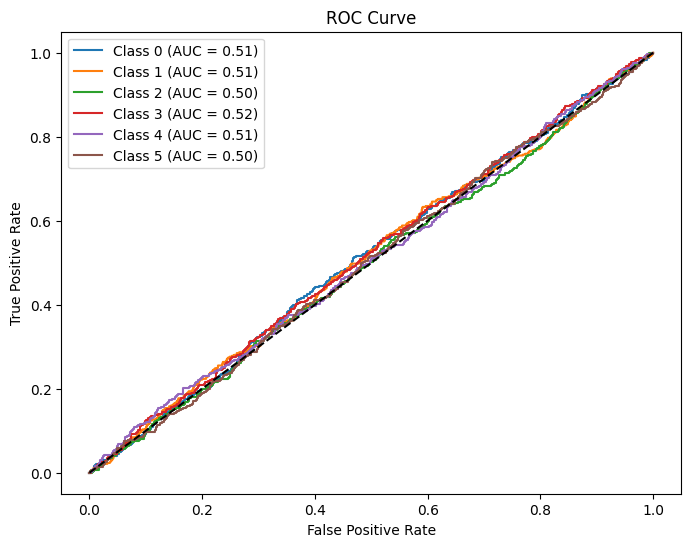

In [52]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the labels for multi-class ROC
y_true_bin = label_binarize(y_true_classes, classes=np.arange(len(seg_train.class_indices)))

plt.figure(figsize=(8, 6))
for i in range(y_true_bin.shape[1]):  # Loop over each class
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


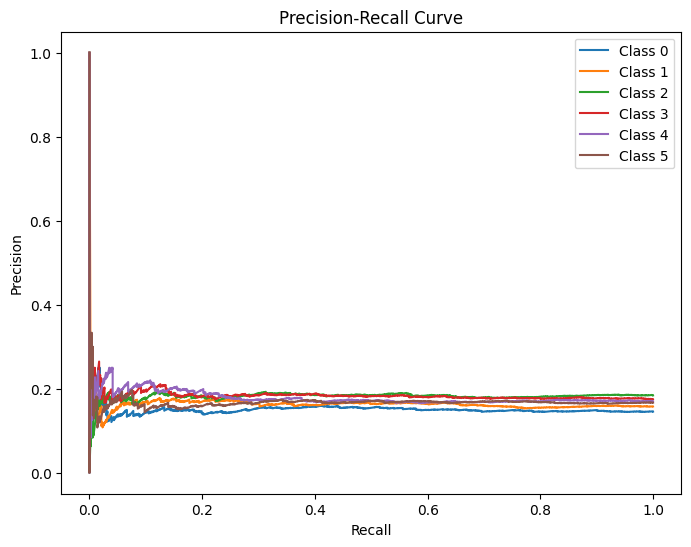

In [53]:
plt.figure(figsize=(8, 6))
for i in range(y_true_bin.shape[1]):  # Loop over each class
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
